In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!source /content/drive/MyDrive/colab_env/bin/activate

import sys
sys.path.append("/content/drive/MyDrive/colab_env/lib/python3.10/site-packages")

/bin/bash: line 1: /content/drive/MyDrive/colab_env/bin/activate: No such file or directory


In [2]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [3]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2023-12-25 15:18:23--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.1.113, 142.250.1.102, 142.250.1.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.1.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c6kma806rb3rtb5et47hcu1kbsvtk8p1/1703517450000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=913032dc-6d60-405e-b6f6-b67e5fed2ac8 [following]
--2023-12-25 15:18:27--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c6kma806rb3rtb5et47hcu1kbsvtk8p1/1703517450000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=913032dc-6d60-405e-b6f6-b67e5fed2ac8
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.217.212.132, 2607:f8b0:4001:c03::84
Connecting to doc-0k-9o

In [ ]:
!pip install bar_chart_race
!add-apt-repository -y ppa:savoury1/ffmpeg4
!apt-get -qq install -y ffmpeg

In [ ]:
# !pip install AnimatedWordCloud

In [ ]:
# !nvidia-smi

In [ ]:
!pip install transformers==4.30.2
!pip install spacy_transformers

In [6]:
import os
import time
import glob
import json
import jieba
import spacy
import string
# import opencc
import numpy as np
import pandas as pd
import transformers
import seaborn as sns
import matplotlib as mpl
import spacy_transformers
import bar_chart_race as bcr
import matplotlib.pyplot as plt
from spacy.tokens import DocBin
from spacy.training import Example
# from stopwordsiso import stopwords
from matplotlib.font_manager import fontManager
from sklearn.model_selection import train_test_split
from spacy.pipeline.textcat_multilabel import Config, multi_label_cnn_config

In [7]:
os.chdir('/content/drive/MyDrive/Capstone/Spacy')

In [10]:
plt.style.use('seaborn')
fontManager.addfont('/content/TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family = 'Taipei Sans TC Beta')

<ipython-input-10-b3073de787f3>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [11]:
def get_json(file_path):
    with open(file_path, 'r', encoding = 'utf-8') as file:
        content = json.load(file, strict = False)
    return content

In [12]:
spacy.prefer_gpu()
overall_clf = spacy.load('./Overall_Layer/output_1225/model-last')
game_clf = spacy.load('./Game_Layer/output/model-best')
chat_clf = spacy.load('./Chat_Layer/output/model-best')

In [ ]:
# !python -m spacy validate

In [ ]:
# !python -m spacy evaluate ./Game_Layer/output_game_1215/model-best/ --output ./Game_Layer/output_game_1215/metrics.json ./Game_Layer/data/valid.spacy --gpu-id 0

In [13]:
df = pd.read_csv('./data/chat_df_w_file_usr_time_text.csv')

## Animated Word Cloud

- Need Python 3.8
- [Animated Word Clouds: A Novel Way for the Visualization of Word Frequencies](https://python.plainenglish.io/animated-word-cloud-a-novel-way-for-the-visualization-of-word-frequencies-6505418acbb3) | Medium article
- [WordSwarm](https://github.com/thisIsMikeKane/WordSwarm) | GitHub
- [Animated Word Cloud](https://github.com/PetrKorab/Animated-Word-Cloud?tab=readme-ov-file) | GitHub

In [ ]:
stop_words_combined = list(stopwords(["zh"]))

cc = opencc.OpenCC('s2t.json')
stopword = []

for i in stop_words_combined:
    stopword.append(cc.convert(i))

In [ ]:
def remove_punctuation(text):

    translator = str.maketrans("", "", string.punctuation + "！？&#8203;``【oaicite:0】``&#8203;（）［］《》、，。；：‘“’”…￥·")
    text_without_punct = text.translate(translator)
    return text_without_punct

def jieba_cut(text):

    if pd.isna(text):
        return []

    text_without_punct = remove_punctuation(text)
    seg_list = [seg for seg in jieba.cut(text_without_punct) if seg.strip()]

    return seg_list

def tokenizer(doc):

    seg = jieba_cut(doc)
    filtered_seg = [word for word in seg if(word not in stopword) and (len(word) > 1)]

    return filtered_seg

In [ ]:
jieba.load_userdict('./dict.txt.big')

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.616 seconds.
DEBUG:jieba:Loading model cost 1.616 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [ ]:
os.chdir('./team_player/')

In [ ]:
file = glob.glob('./player/*.txt')

for t in file:
    jieba.load_userdict(t)

In [ ]:
team_file = './team/team.txt'
jieba.load_userdict(team_file)

In [ ]:
vocab = set()
for i in range(len(df)):
    cut = tokenizer(df['text'][i])

    for j in cut:
        vocab.add(j)

## Hierachy Model

In [14]:
df['text'] = df['text'].astype(str)

In [ ]:
df['file'][0]

'chat_1Xw3Kmbd_a8.json'

In [15]:
df['加油'] = ''
df['轉播'] = ''
df['閒聊'] = ''
df['球員'] = ''
df['教練'] = ''
df['裁判'] = ''
df['戰術'] = ''
df['球隊'] = ''
df['POSITIVE'] = ''
df['NEGATIVE'] = ''
df['NEUTRAL'] = ''
df['execute (sec)'] = ''

for i in range(len(df)):

    start_time = time.time()

    o = overall_clf(df['text'][i]).cats

    ## Hierarchy Topic Classification
    ## Broadcast
    if o['轉播'] >= 0.7:
        df.at[i, '轉播'] = 1
    else:
        df.at[i, '轉播'] = 0

    ## Cheer
    if o['加油'] >= 0.7:
        df.at[i, '加油'] = 1
    else:
        df.at[i, '加油'] = 0

    ## Chat
    if o['閒聊'] >= 0.7:
        df.at[i, '閒聊'] = 1
    else:
        df.at[i, '閒聊'] = 0

    ## Game
    if o['比賽'] >= 0.7:
        g = game_clf(df['text'][i]).cats

        ## Player
        if g['球員'] >= 0.7:
            df.at[i, '球員'] = 1
        else:
            df.at[i, '球員'] = 0

        ## Coach
        if g['教練'] >= 0.7:
            df.at[i, '教練'] = 1
        else:
            df.at[i, '教練'] = 0

        ## Judge
        if g['裁判'] >= 0.7:
            df.at[i, '裁判'] = 1
        else:
            df.at[i, '裁判'] = 0

        ## Tactic
        if g['戰術'] >= 0.7:
            df.at[i, '戰術'] = 1
        else:
            df.at[i, '戰術'] = 0

        ## Team
        if g['球隊'] >= 0.7:
            df.at[i, '球隊'] = 1
        else:
            df.at[i, '球隊'] = 0
    else:
        df.at[i, '球員'] = 0
        df.at[i, '教練'] = 0
        df.at[i, '裁判'] = 0
        df.at[i, '戰術'] = 0
        df.at[i, '球隊'] = 0

    ## Sentiment Analysis
    c = chat_clf(df['text'][i]).cats

    ## Positive
    if c['positive'] >= 0.7:
        df.at[i, 'POSITIVE'] = 1
    else:
        df.at[i, 'POSITIVE'] = 0

    ## Negative
    if c['negative'] >= 0.7:
        df.at[i, 'NEGATIVE'] = 1
    else:
        df.at[i, 'NEGATIVE'] = 0

    ## Neutral
    if c['neutral'] >= 0.7:
        df.at[i, 'NEUTRAL'] = 1
    else:
        df.at[i, 'NEUTRAL'] = 0

    end_time = time.time()
    df.at[i, 'execute (sec)'] = end_time - start_time

    if i % 1000 == 0:
        print(f'Progess: {round((i / len(df)*100), 4)} %')
        df.to_csv('./data/final_result.csv', index = False)

df.to_csv('./data/final_result.csv', index = False)

Progess: 0.0 %
Progess: 0.8192 %
Progess: 1.6383 %
Progess: 2.4575 %
Progess: 3.2766 %
Progess: 4.0958 %
Progess: 4.915 %
Progess: 5.7341 %
Progess: 6.5533 %
Progess: 7.3725 %
Progess: 8.1916 %
Progess: 9.0108 %
Progess: 9.8299 %
Progess: 10.6491 %
Progess: 11.4683 %
Progess: 12.2874 %
Progess: 13.1066 %
Progess: 13.9258 %
Progess: 14.7449 %
Progess: 15.5641 %
Progess: 16.3832 %
Progess: 17.2024 %
Progess: 18.0216 %
Progess: 18.8407 %
Progess: 19.6599 %
Progess: 20.479 %
Progess: 21.2982 %
Progess: 22.1174 %
Progess: 22.9365 %
Progess: 23.7557 %
Progess: 24.5749 %
Progess: 25.394 %
Progess: 26.2132 %
Progess: 27.0323 %
Progess: 27.8515 %
Progess: 28.6707 %
Progess: 29.4898 %
Progess: 30.309 %
Progess: 31.1281 %
Progess: 31.9473 %
Progess: 32.7665 %
Progess: 33.5856 %
Progess: 34.4048 %
Progess: 35.224 %
Progess: 36.0431 %
Progess: 36.8623 %
Progess: 37.6814 %
Progess: 38.5006 %
Progess: 39.3198 %
Progess: 40.1389 %
Progess: 40.9581 %
Progess: 41.7773 %
Progess: 42.5964 %
Progess: 43.41

## Data Analysis

In [16]:
df = pd.read_csv('./data/final_result.csv')

In [17]:
df

,file,user,time,text,加油,轉播,閒聊,球員,教練,裁判,戰術,球隊,POSITIVE,NEGATIVE,NEUTRAL,execute (sec)
0,chat_1Xw3Kmbd_a8.json,章魚燒,1:25,小温加油！美津濃加油🔥🔥,1,0,0,1,0,0,0,1,1,0,0,15.143771
1,chat_1Xw3Kmbd_a8.json,文妤,2:01,美津濃加油,1,0,0,0,0,0,0,1,1,0,0,0.059406
2,chat_1Xw3Kmbd_a8.json,乃瑄,2:10,⚡⚡⚡加油,1,0,0,0,0,0,0,1,1,0,0,0.047933
3,chat_1Xw3Kmbd_a8.json,洪淑惠,2:26,美津濃加油❤,1,0,0,0,0,0,0,1,1,0,0,0.050956
4,chat_1Xw3Kmbd_a8.json,Ppppppj,2:31,阿甘真的加了,0,0,0,1,0,0,0,0,0,1,0,0.047953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122071,chat_SAgpRa1oSUA.json,村田千夜,2:42:45,主播賽評轉播單位辛苦了,0,1,0,0,0,0,0,0,1,0,0,0.042099
122072,chat_SAgpRa1oSUA.json,啟恆,2:42:48,中原斷電 只能靠太陽能,0,0,0,0,0,0,0,1,0,0,0,0.063246
122073,chat_SAgpRa1oSUA.json,村田千夜,2:42:57,臺產超棒,0,0,0,0,0,0,0,1,1,0,0,0.064358
122074,chat_SAgpRa1oSUA.json,Chen Darren,2:43:13,你很會說欸,0,0,1,0,0,0,0,0,0,0,1,0.046292


In [ ]:
game_message_counts = df.groupby('file')['text'].count()

max_game = game_message_counts.idxmax()
max_messages = game_message_counts.max()

print(f"The game with the highest number of chat messages is '{max_game}' with {max_messages} messages.")

The game with the highest number of chat messages is 'chat_0sj9YWqKaKU.json' with 5302 messages.


In [ ]:
df['execute (sec)'].describe()

In [ ]:
champ = df[df['file'] == 'chat_0sj9YWqKaKU.json']
champ.set_index('time', inplace = True)

### Deal w/ different type of comments on the same time

In [ ]:
ma_20 = champ.rolling(window = 20).mean()
ma_20.drop(columns = ['execute (sec)', 'NEUTRAL'], inplace = True)

ma_20.reset_index(inplace = True)
ma_20_ms = ma_20[19:1290]
ma_20_hms = ma_20[1290:]

## Time format
ma_20_ms['time'] = pd.to_datetime(ma_20_ms['time'], errors='coerce', format='%M:%S')
ma_20_hms['time'] = pd.to_datetime(ma_20_hms['time'], errors='coerce', format='%H:%M:%S')
ma_20 = pd.concat([ma_20_ms, ma_20_hms])

## Sum up the value of different comment in the same time
ma_20.set_index('time', inplace = True)
ma_20.index = ma_20.index.strftime('%H:%M:%S')
ma_20.reset_index(inplace = True)
ma_20 = ma_20.groupby(ma_20['time']).sum()

In [ ]:
ma_20

,加油,轉播,球員,教練,裁判,戰術,球隊,POSITIVE,NEGATIVE
time,,,,,,,,,
00:01:13,0.20,0.0,0.20,0.0,0.0,0.30,0.20,0.30,0.00
00:01:15,0.90,0.0,0.75,0.0,0.0,0.75,0.75,0.75,0.00
00:01:22,0.35,0.0,0.30,0.0,0.0,0.30,0.30,0.15,0.00
00:01:25,0.40,0.0,0.30,0.0,0.0,0.35,0.30,0.15,0.00
00:01:32,0.35,0.0,0.25,0.0,0.0,0.40,0.25,0.15,0.00
...,...,...,...,...,...,...,...,...,...
02:52:23,0.05,0.0,0.35,0.0,0.1,0.15,0.15,0.40,0.05
02:52:25,0.00,0.0,0.35,0.0,0.1,0.15,0.10,0.40,0.05
02:52:30,0.00,0.0,0.30,0.0,0.1,0.15,0.10,0.45,0.05


### Interpolate time to make it continuous

In [ ]:
ma_20['time'] = pd.to_datetime(ma_20.index)

ma_20 = ma_20.set_index('time').resample('S').interpolate().reset_index()
ma_20.set_index('time', inplace = True)
ma_20.index = ma_20.index.strftime('%H:%M:%S')

## Visualization

### Heat

In [ ]:
ma_20['Heat'] = ma_20.sum(axis = 1)

In [ ]:
prepare = ma_20[(ma_20.index < '00:05:23') |
                (('00:39:36' < ma_20.index) & (ma_20.index <= '00:45:13')) |
                (('01:09:02' < ma_20.index) & (ma_20.index <= '01:14:18')) |
                (('01:36:20' < ma_20.index) & (ma_20.index <= '01:42:26')) |
                (('02:15:17' < ma_20.index) & (ma_20.index <= '02:20:57')) |
                (ma_20.index > '02:39:25')]

game1 = ma_20[(ma_20.index >= '00:05:23') & (ma_20.index < '00:39:35')]  ## 2052
game2 = ma_20[(ma_20.index >= '00:45:14') & (ma_20.index < '01:09:02')]  ## 1428
game3 = ma_20[(ma_20.index >= '01:14:19') & (ma_20.index < '01:36:19')]  ## 1320
game4 = ma_20[(ma_20.index >= '01:42:27') & (ma_20.index < '02:15:17')]  ## 1970
game5 = ma_20[(ma_20.index >= '02:20:58') & (ma_20.index < '02:39:24')]  ## 1106

In [ ]:
ma_20['Segment'] = 0

ma_20.loc[(ma_20.index >= '00:05:23') & (ma_20.index < '00:39:35'), 'Segment'] = 1
ma_20.loc[(ma_20.index >= '00:45:14') & (ma_20.index < '01:09:02'), 'Segment'] = 1
ma_20.loc[(ma_20.index >= '01:14:19') & (ma_20.index < '01:36:19'), 'Segment'] = 1
ma_20.loc[(ma_20.index >= '01:42:27') & (ma_20.index < '02:15:17'), 'Segment'] = 1
ma_20.loc[(ma_20.index >= '02:20:58') & (ma_20.index < '02:39:24'), 'Segment'] = 1

In [ ]:
ma_20.reset_index(inplace = True)
ma_20['time'] = pd.to_datetime(ma_20['time'])
prepare = ma_20[ma_20['Segment'] == 0]
game = ma_20[ma_20['Segment'] == 1]
continuous_time = pd.DataFrame(index = pd.date_range(start = ma_20['time'].min(), end = ma_20['time'].max(), freq = 'S'))
con_game = pd.merge(continuous_time, game, left_index = True, right_on = 'time', how = 'left')
con_prepare = pd.merge(continuous_time, prepare, left_index = True, right_on = 'time', how = 'left')
con_game.set_index('time', inplace = True)
con_game.index = con_game.index.strftime('%H:%M:%S')
con_prepare.set_index('time', inplace = True)
con_prepare.index = con_prepare.index.strftime('%H:%M:%S')
ma_20.set_index('time', inplace = True)
ma_20.index = ma_20.index.strftime('%H:%M:%S')

<Figure size 1600x1000 with 0 Axes>

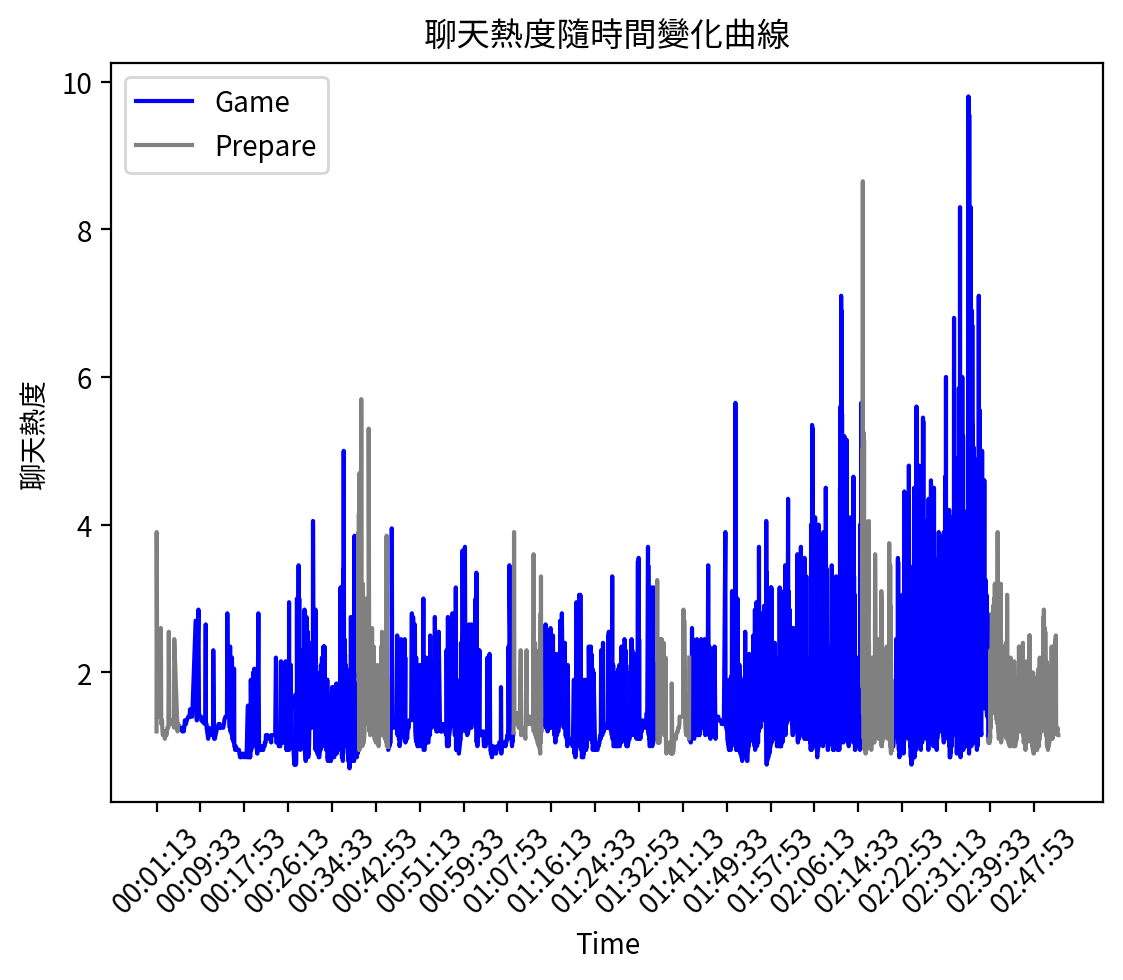

In [ ]:
plt.figure(figsize = (16, 10))
fig, ax = plt.subplots()
ax.plot(con_game.index, con_game['Heat'], label = 'Game', color = 'blue')
ax.plot(con_prepare.index, con_prepare['Heat'], label = 'Prepare', color = 'gray')
ax.set_xlabel('Time')
ax.set_ylabel('聊天熱度')
ax.legend()
plt.title('聊天熱度隨時間變化曲線')
plt.xticks(range(0, len(ma_20), 500), ma_20.index[::500], rotation = 45)
plt.show()

In [ ]:
game1.reset_index(inplace = True)
game1.reset_index(inplace = True)
game2.reset_index(inplace = True)
game2.reset_index(inplace = True)
game3.reset_index(inplace = True)
game3.reset_index(inplace = True)
game4.reset_index(inplace = True)
game4.reset_index(inplace = True)
game5.reset_index(inplace = True)
game5.reset_index(inplace = True)

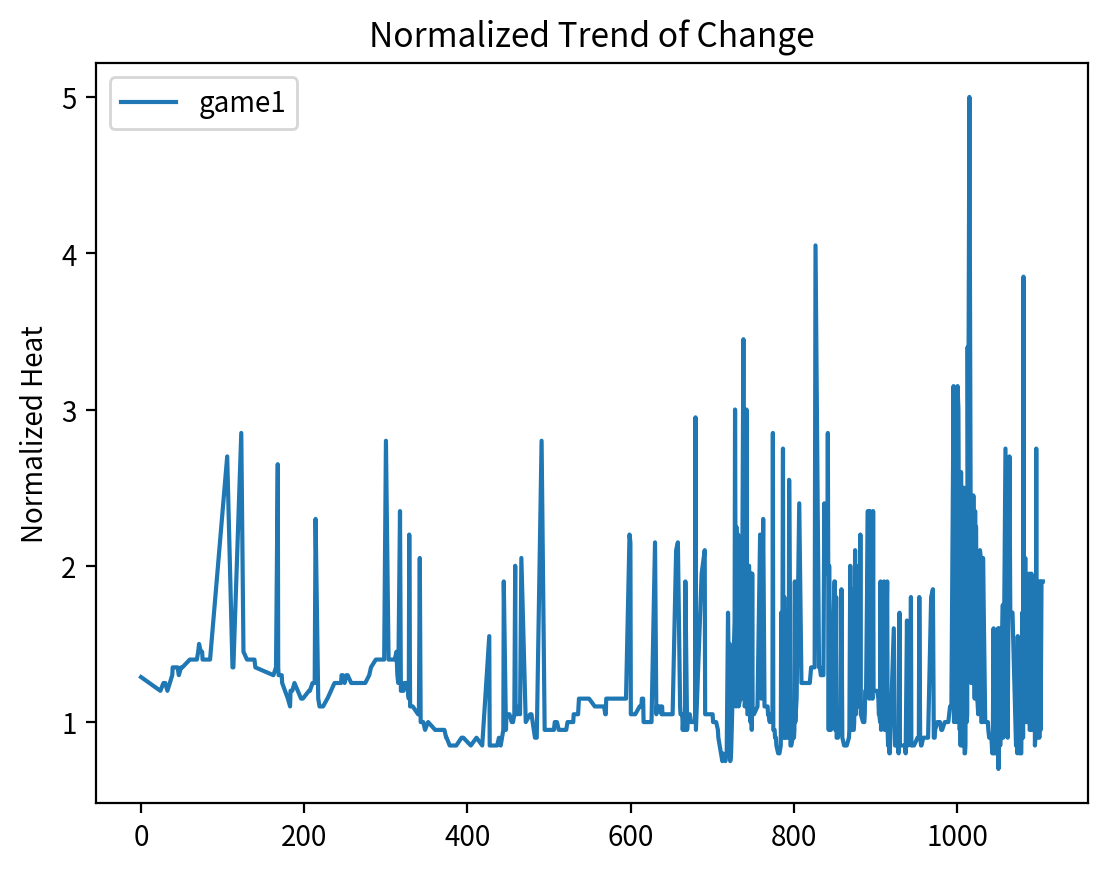

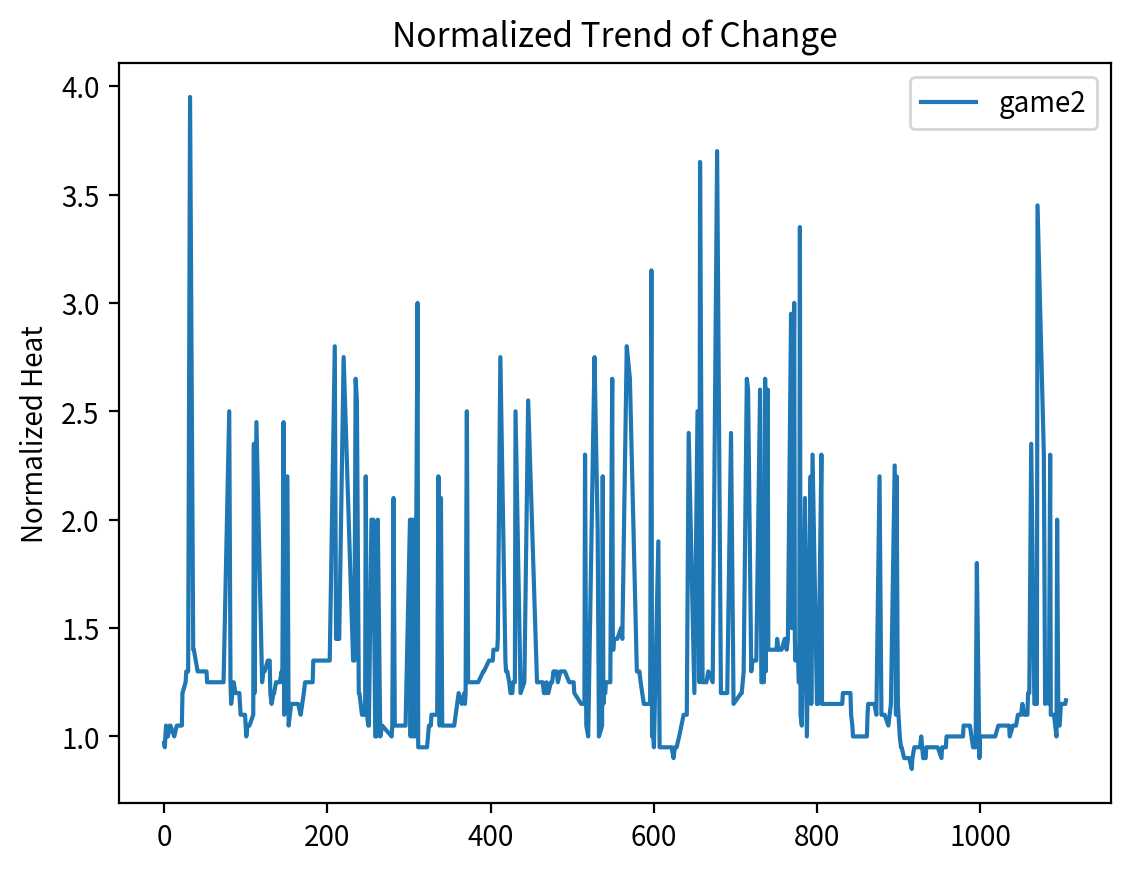

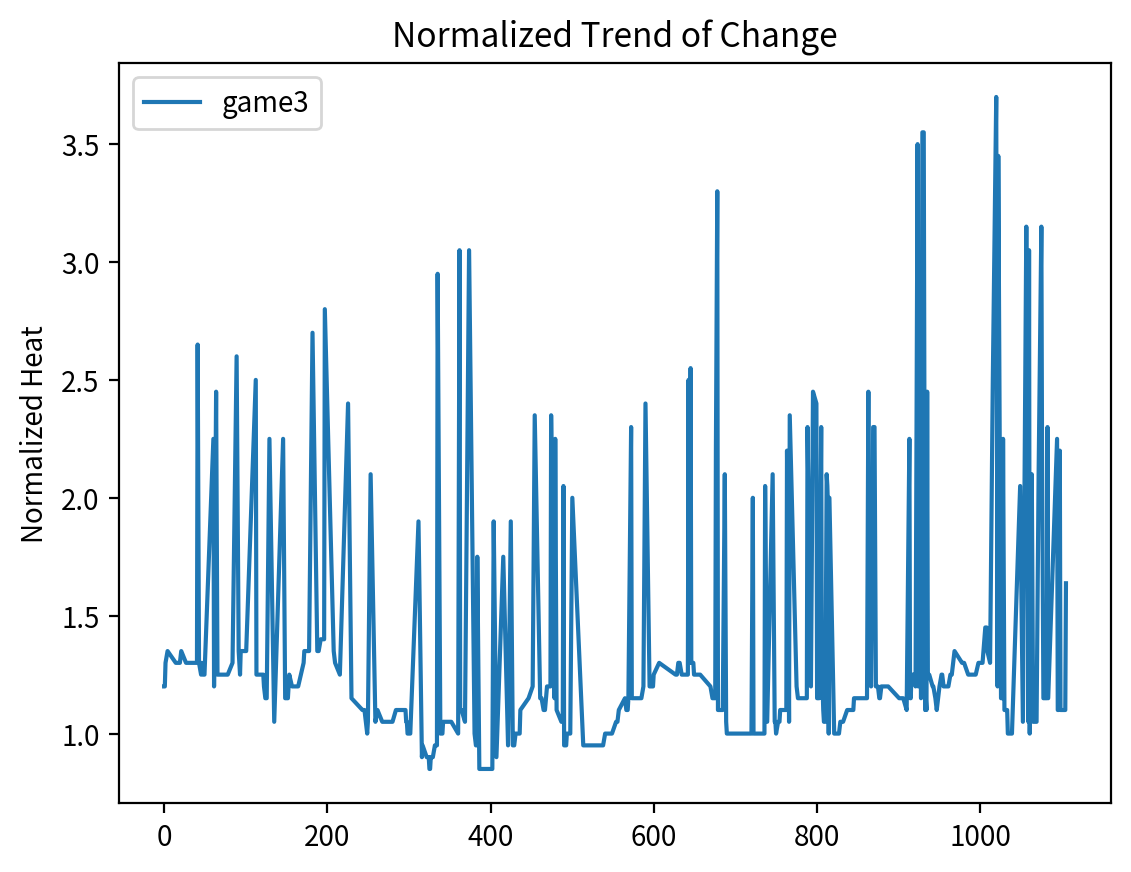

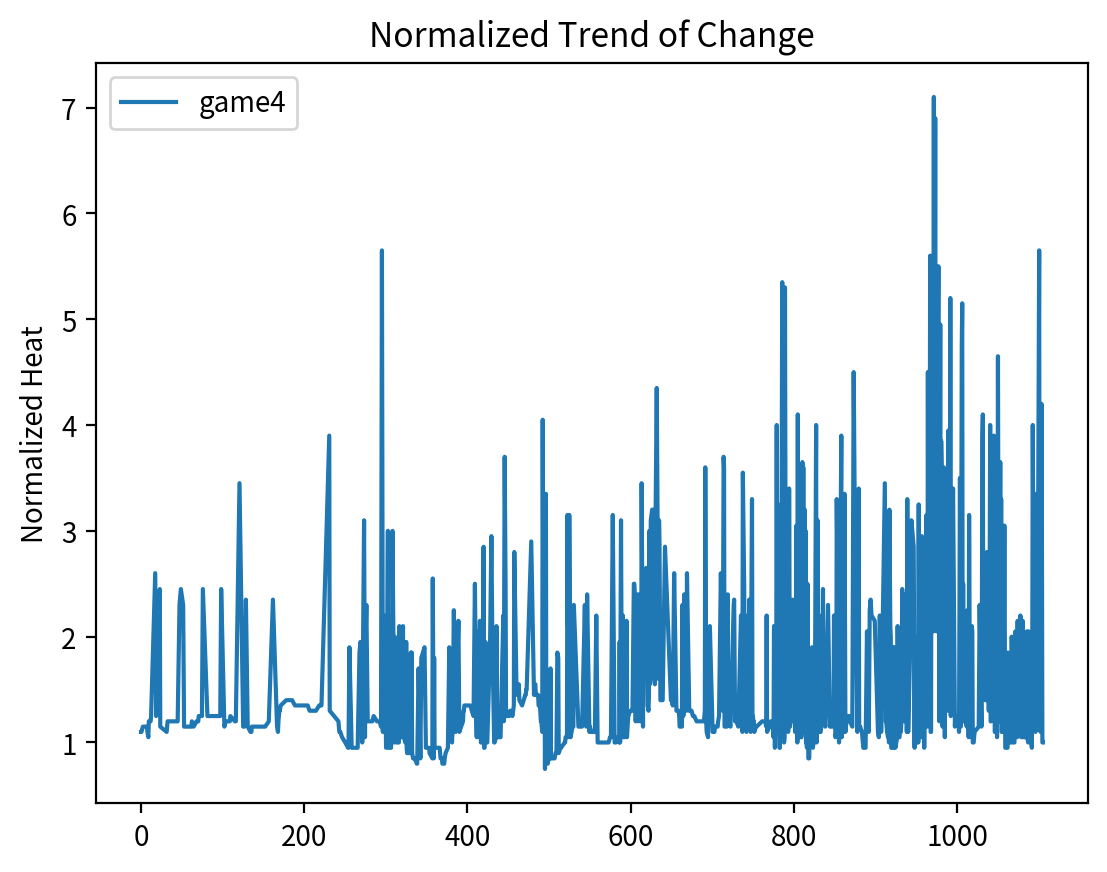

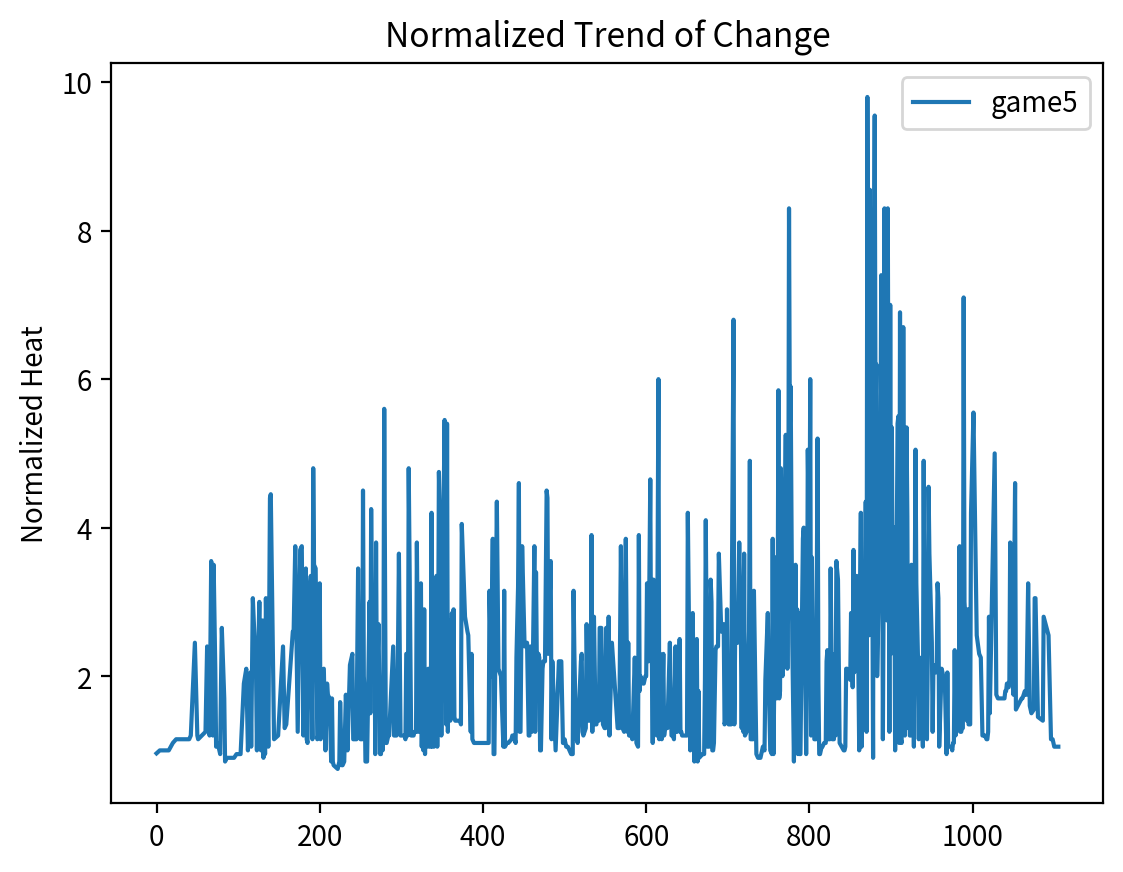

In [ ]:
# start_point = max(game['index'].min() for game in [game1, game2, game3, game4, game5])
# end_point = min(game['index'].max() for game in [game1, game2, game3, game4, game5])

# normalized_games = []
# for game in [game1, game2, game3, game4, game5]:
#     mul = end_point / game['index'][len(game) - 1]
#     game['index'] = game['index'] * mul
#     normalized_games.append(game)


# plt.figure(figsize = (16, 10))

for i, game in enumerate(normalized_games):
    plt.plot(game['index'], game['Heat'], label=f'game{i+1}')

# plt.xlabel('index')
    plt.ylabel('Normalized Heat')
    plt.title('Normalized Trend of Change')
    plt.legend()
    plt.show()

### Topic

In [ ]:
ma_20['Chat'] = ma_20['POSITIVE'] + ma_20['NEGATIVE']

In [ ]:
col = ma_20.columns.drop(['Heat', 'Segment', 'POSITIVE', 'NEGATIVE'])

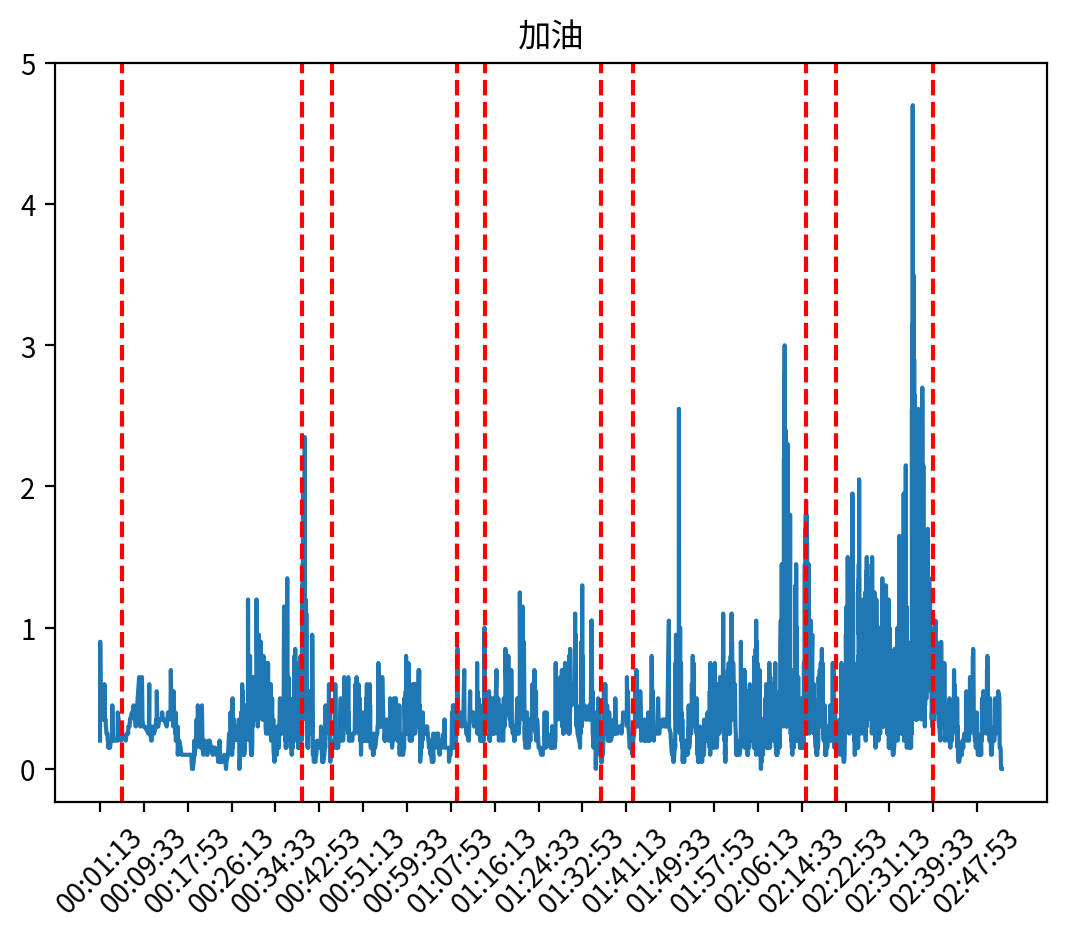

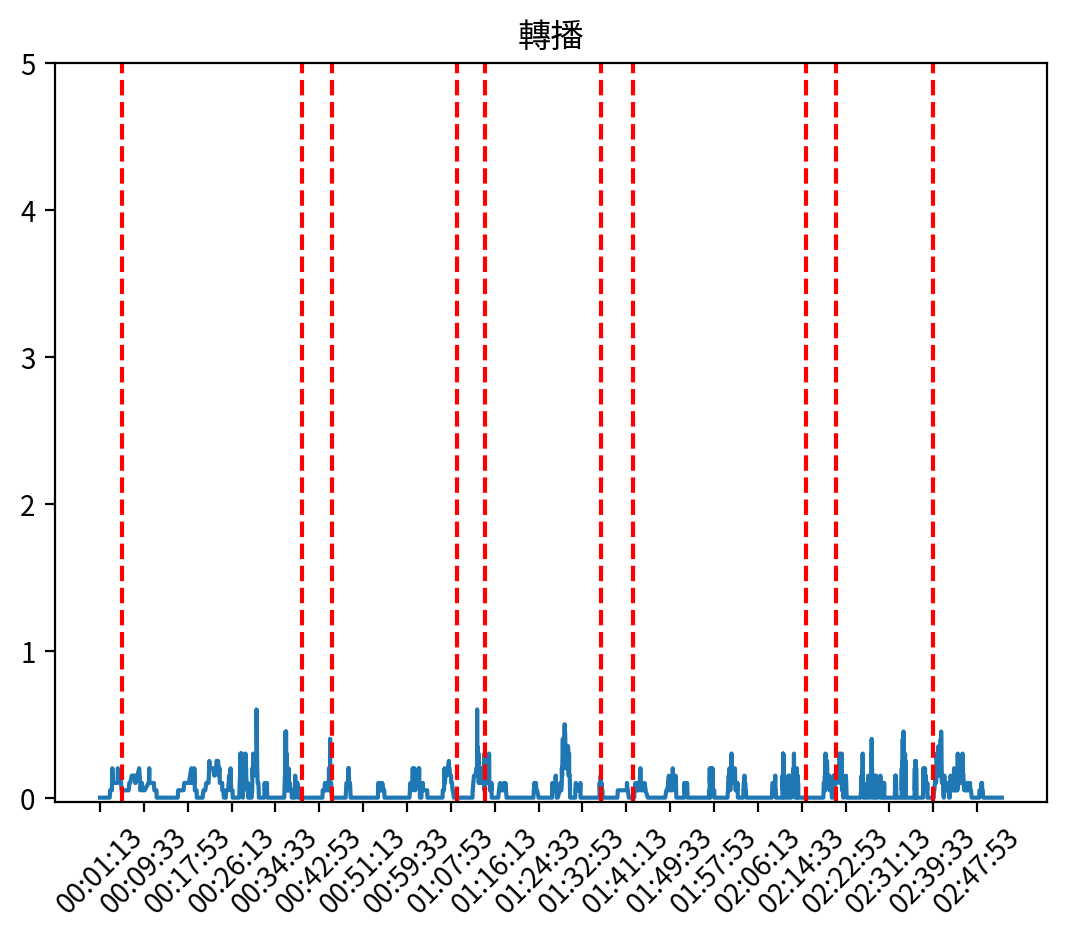

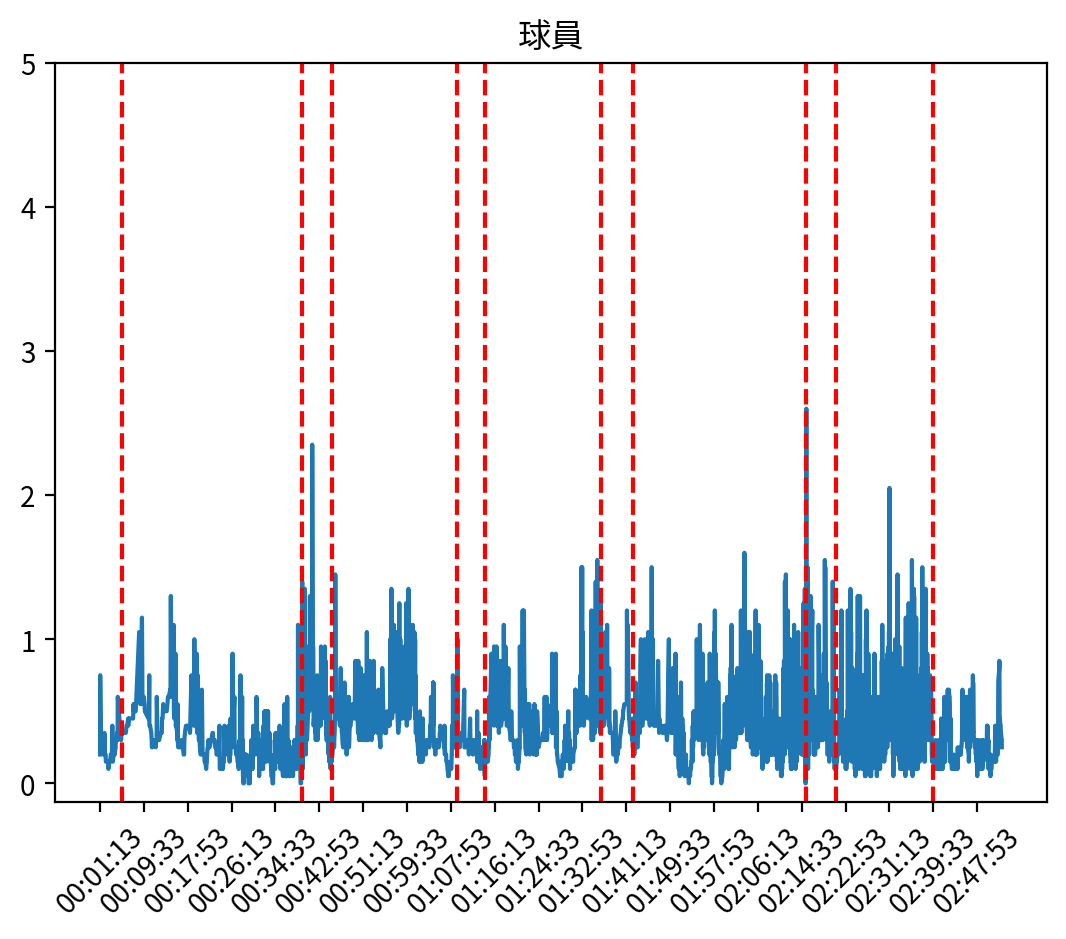

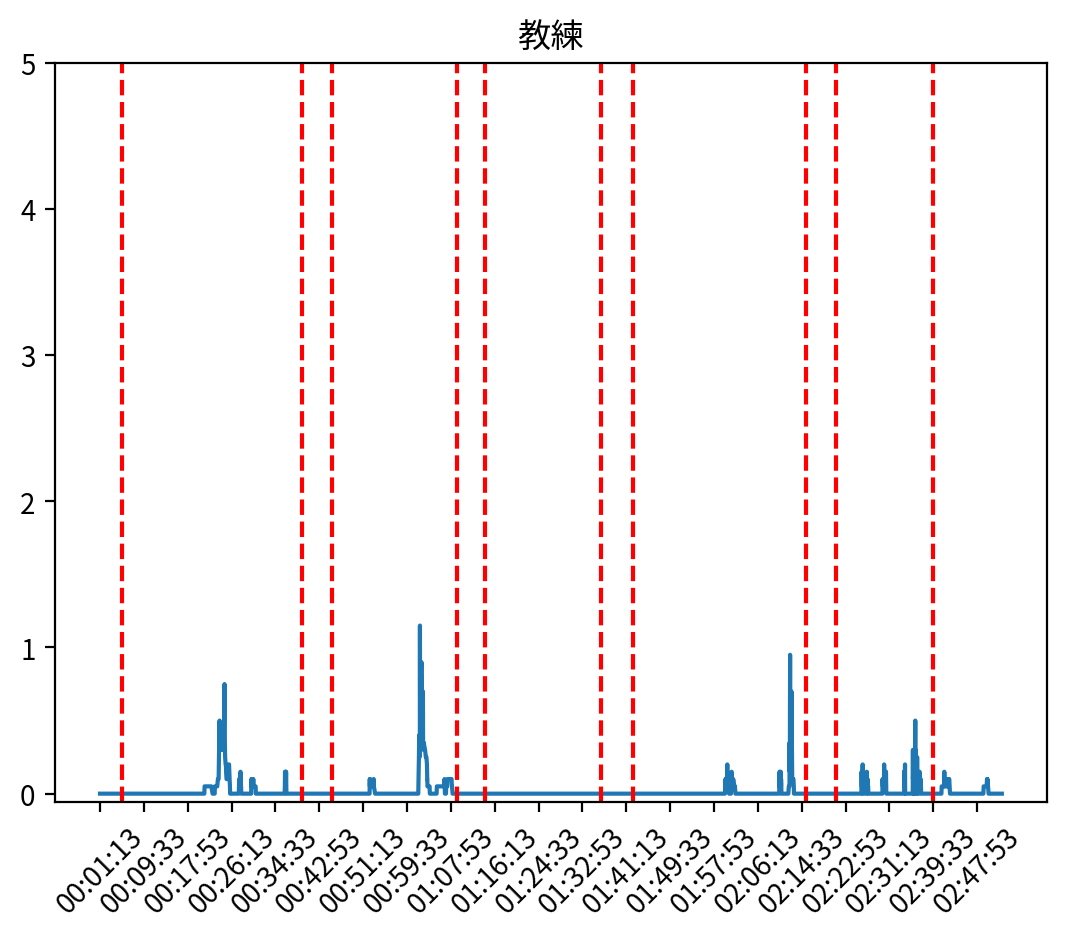

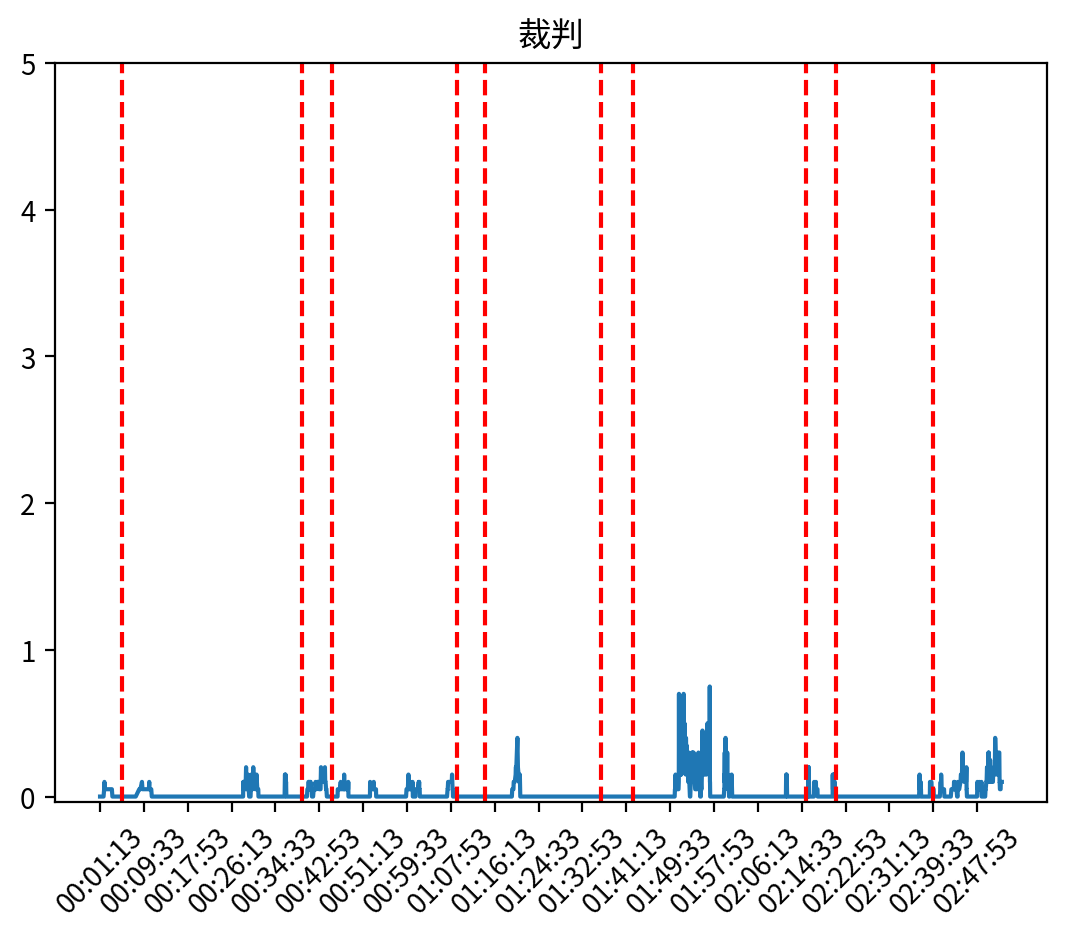

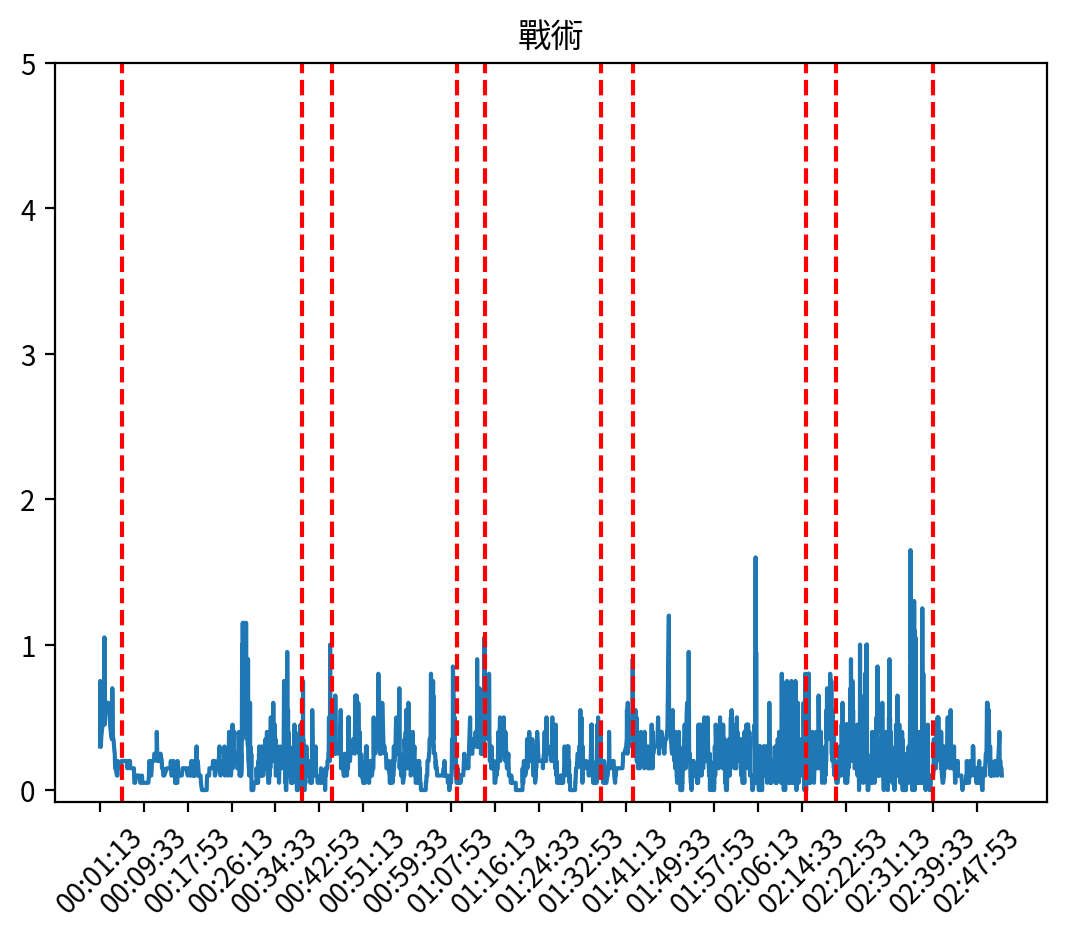

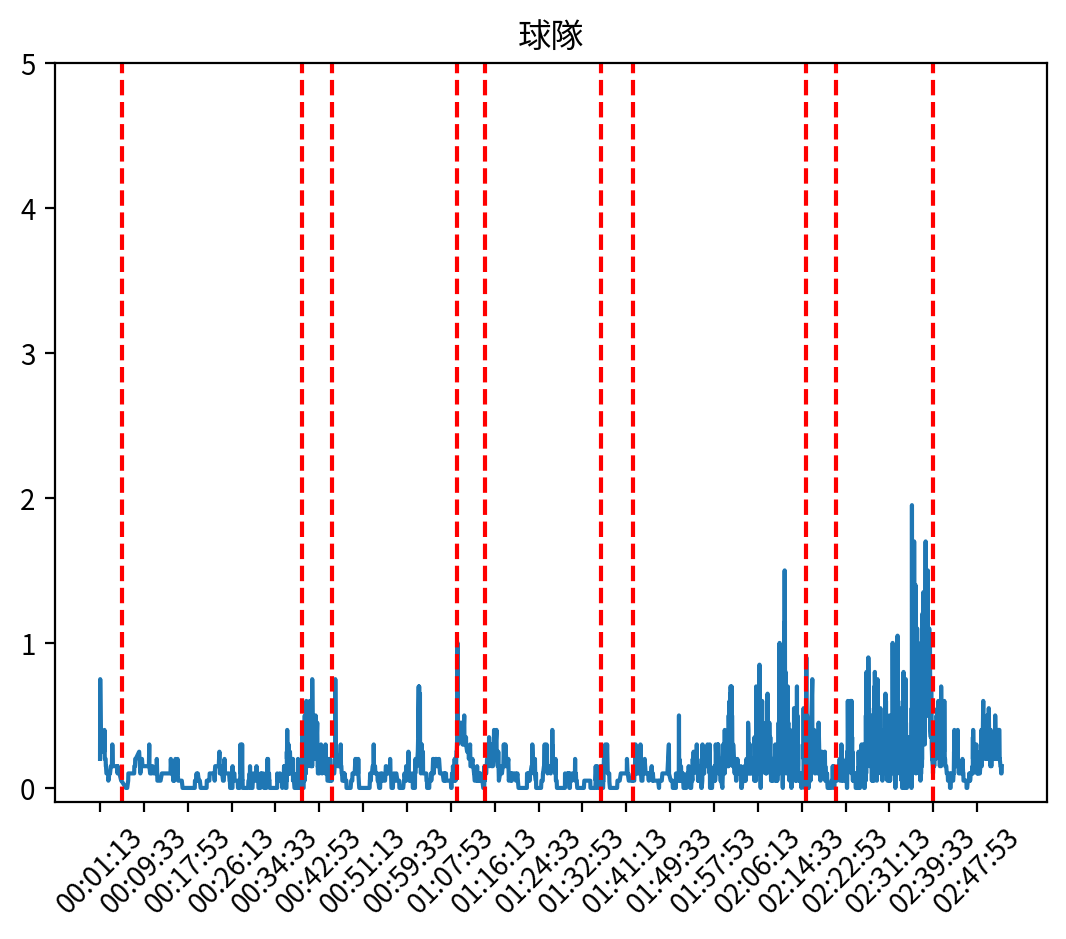

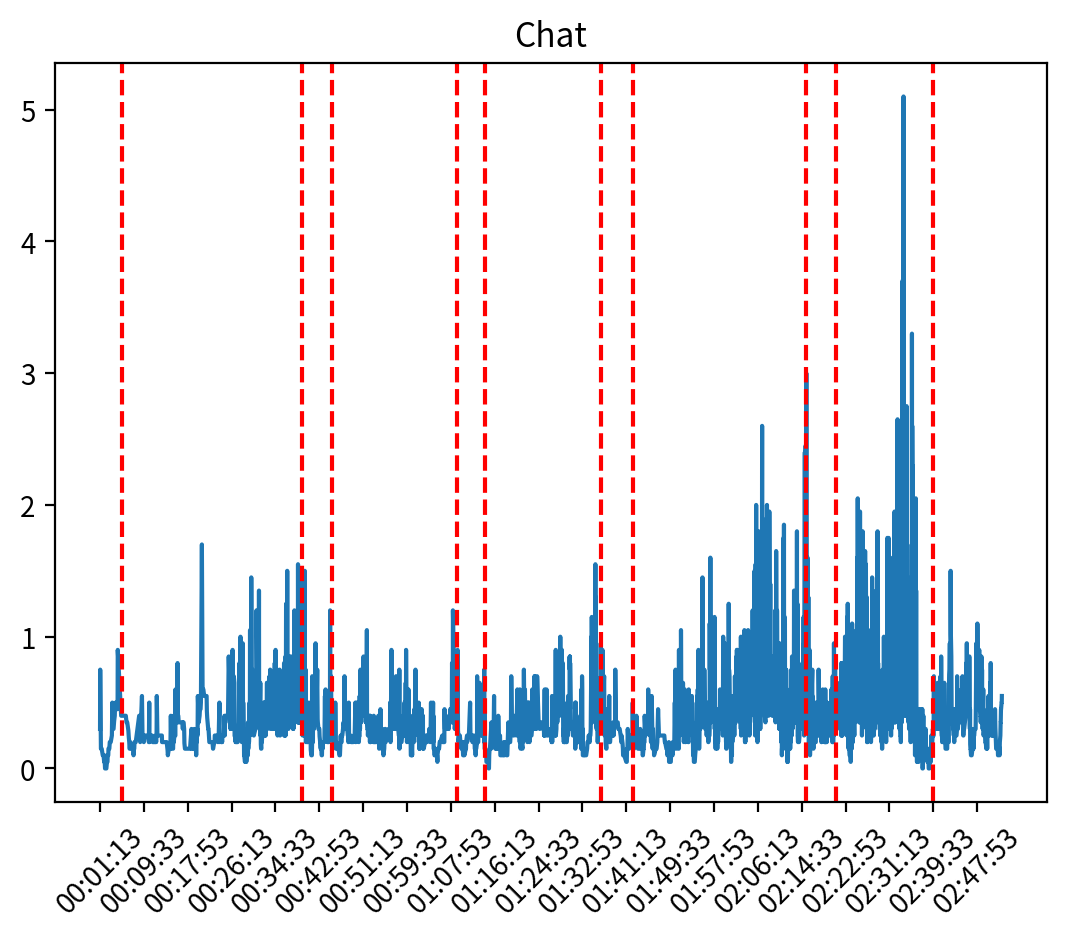

In [ ]:
time_code = ['00:05:23', '00:39:35', '00:45:14', '01:09:02', '01:14:19', '01:36:19', '01:42:27', '02:15:17', '02:20:58', '02:39:24']
for i in col:
    plt.plot(ma_20[i], label = f'i')

    for j in time_code:
        plt.axvline(x = j, color = 'red', linestyle = '--')

    plt.title(f'{i}')
    plt.xticks(range(0, len(ma_20), 500), ma_20.index[::500], rotation = 45)
    plt.yticks(np.arange(0, 5.1, 1))
    plt.show()

### Bar Chart Race

In [ ]:
game1.drop(columns = ['index', 'Heat', 'Segment']).set_index('time')

,加油,轉播,球員,教練,裁判,戰術,球隊,POSITIVE,NEGATIVE
time,,,,,,,,,
00:05:23,0.244,0.05,0.350,0.0,0.0,0.200,0.044,0.350,0.05
00:05:24,0.243,0.05,0.350,0.0,0.0,0.200,0.043,0.350,0.05
00:05:25,0.242,0.05,0.350,0.0,0.0,0.200,0.042,0.350,0.05
00:05:26,0.241,0.05,0.350,0.0,0.0,0.200,0.041,0.350,0.05
00:05:27,0.240,0.05,0.350,0.0,0.0,0.200,0.040,0.350,0.05
...,...,...,...,...,...,...,...,...,...
00:39:30,0.300,0.00,0.275,0.0,0.0,0.075,0.075,0.550,0.15
00:39:31,0.400,0.00,0.400,0.0,0.0,0.100,0.100,0.700,0.20
00:39:32,0.350,0.00,0.550,0.0,0.0,0.050,0.150,0.600,0.20


In [ ]:
bcr.bar_chart_race(
    df = game1.drop(columns = ['index', 'Heat', 'Segment']).set_index('time'),
    fixed_order = False,
    fixed_max = True,
    label_bars = False,
    title = 'Topic popularity'
)